In [6]:
import xarray as xr
import ocf_blosc2
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# import matplotlib.pyplot as plt
# import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt


In [3]:
forecast_data = pd.read_csv("result_data/final_data_tft2.csv")
forecast_data = forecast_data.drop(columns=['Unnamed: 0'])

In [5]:
forecast_data.columns

Index(['ss_id', 'init_time', 'step', 'generation', 'pv_datetime', 'pv_hour',
       'hour', 'lat', 'long', 'tilt', 'orientation', 'dlwrf', 'dswrf', 'duvrs',
       'hcc', 'lcc', 'mcc', 'sde', 'sr', 't2m', 'tcc', 'u10', 'u100', 'v10',
       'v100'],
      dtype='object')

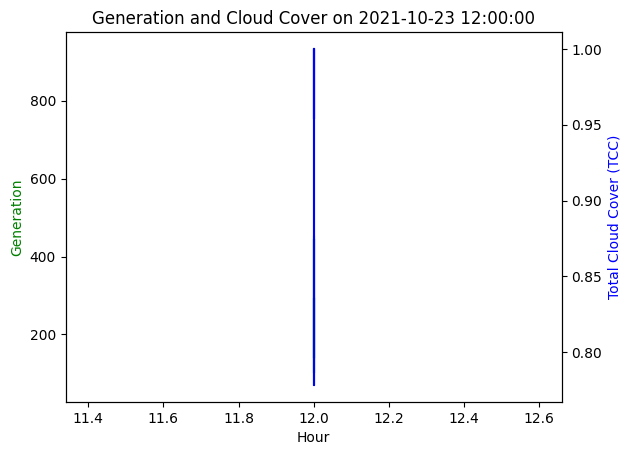

In [7]:
specific_datetime = '2021-10-23 12:00:00'
filtered_df = forecast_data[forecast_data['pv_datetime'] == specific_datetime]

# Plotting the data
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(filtered_df['pv_hour'], filtered_df['generation'], 'g-')
ax2.plot(filtered_df['pv_hour'], filtered_df['tcc'], 'b-')

ax1.set_xlabel('Hour')
ax1.set_ylabel('Generation', color='g')
ax2.set_ylabel('Total Cloud Cover (TCC)', color='b')

plt.title(f'Generation and Cloud Cover on {specific_datetime}')
plt.show()

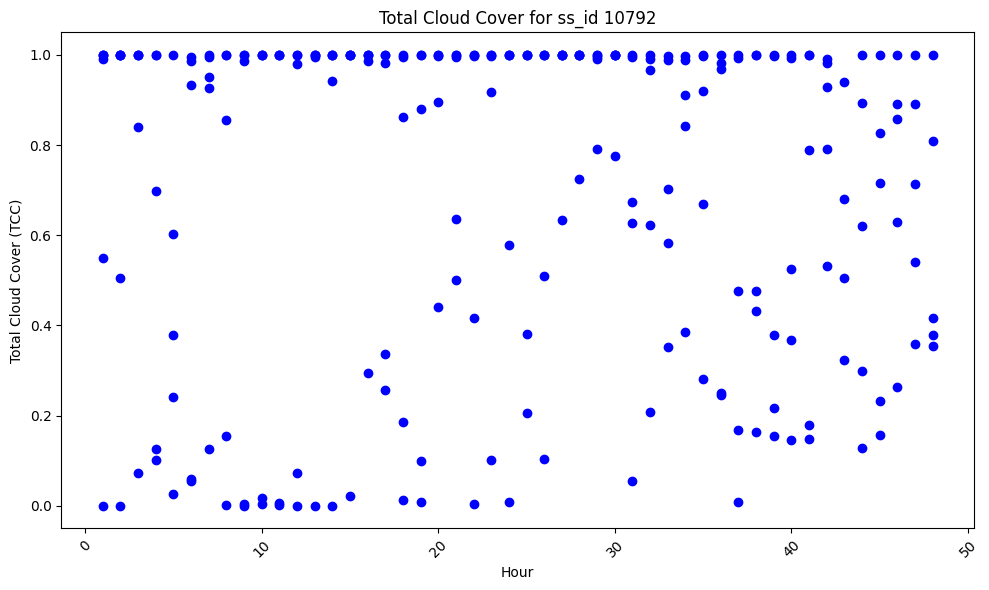

In [11]:
specific_ss_id = 10792
filtered_df = forecast_data[forecast_data['ss_id'] == specific_ss_id]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['hour'], filtered_df['tcc'], color='b')

plt.xlabel('Hour')
plt.ylabel('Total Cloud Cover (TCC)')
plt.title(f'Total Cloud Cover for ss_id {specific_ss_id}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


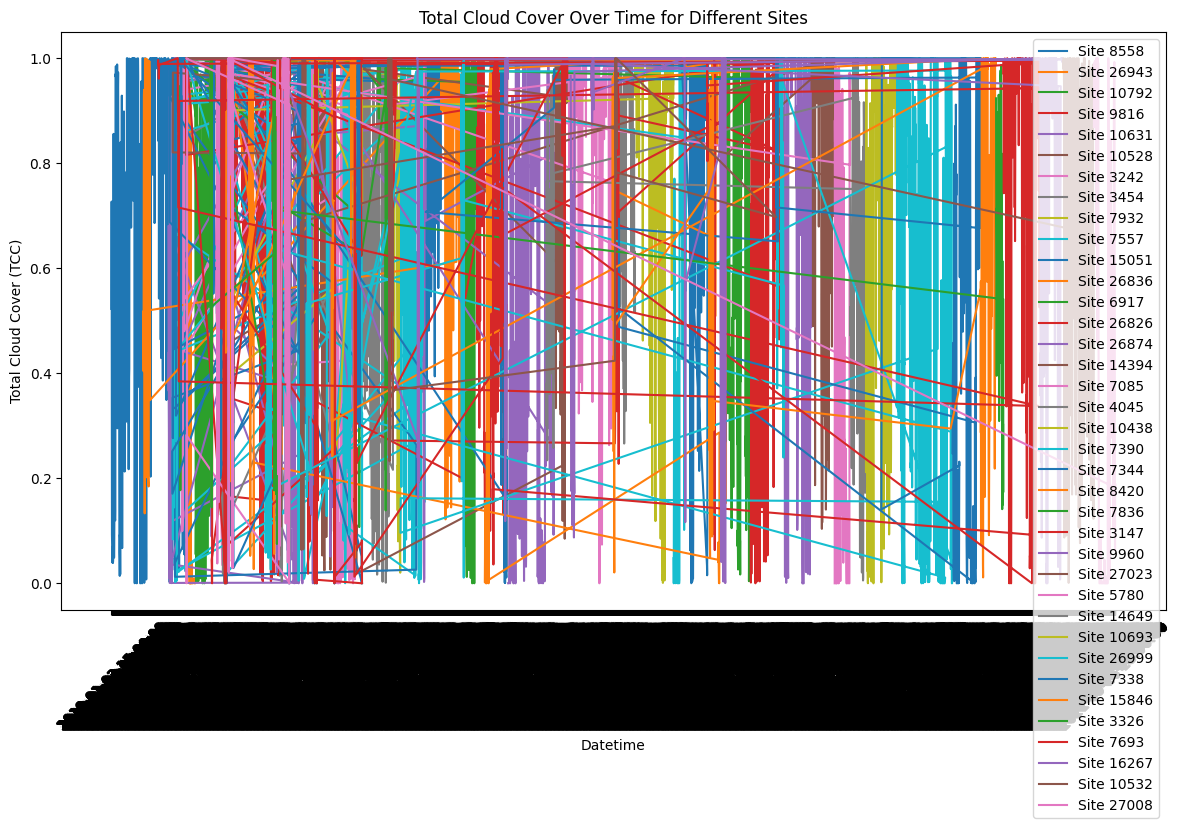

In [12]:
import matplotlib.pyplot as plt

# Unique sites
unique_sites = forecast_data['ss_id'].unique()

# Plotting the data
plt.figure(figsize=(12, 8))

for site in unique_sites:
    site_data = forecast_data[forecast_data['ss_id'] == site]
    plt.plot(site_data['pv_datetime'], site_data['tcc'], label=f'Site {site}')

plt.xlabel('Datetime')
plt.ylabel('Total Cloud Cover (TCC)')
plt.title('Total Cloud Cover Over Time for Different Sites')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


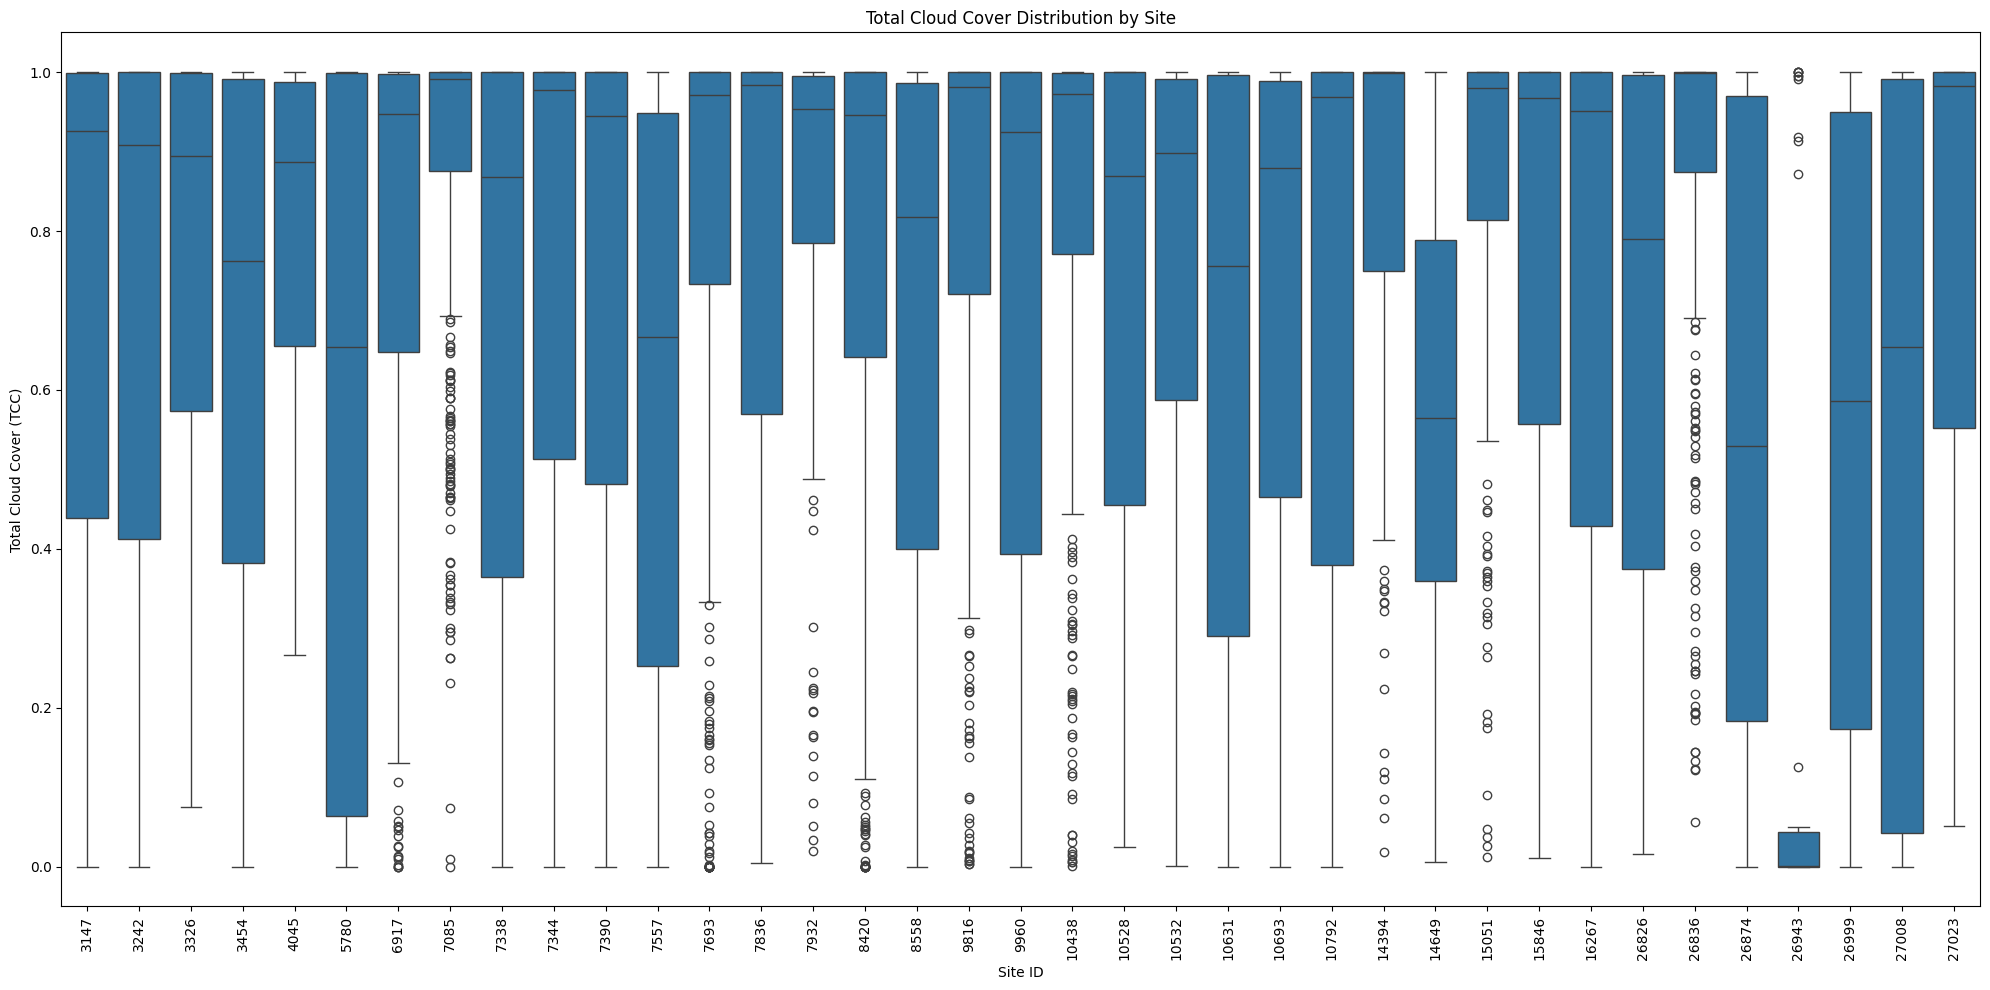

In [15]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='ss_id', y='tcc', data=forecast_data)

plt.xlabel('Site ID')
plt.ylabel('Total Cloud Cover (TCC)')
plt.title('Total Cloud Cover Distribution by Site')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


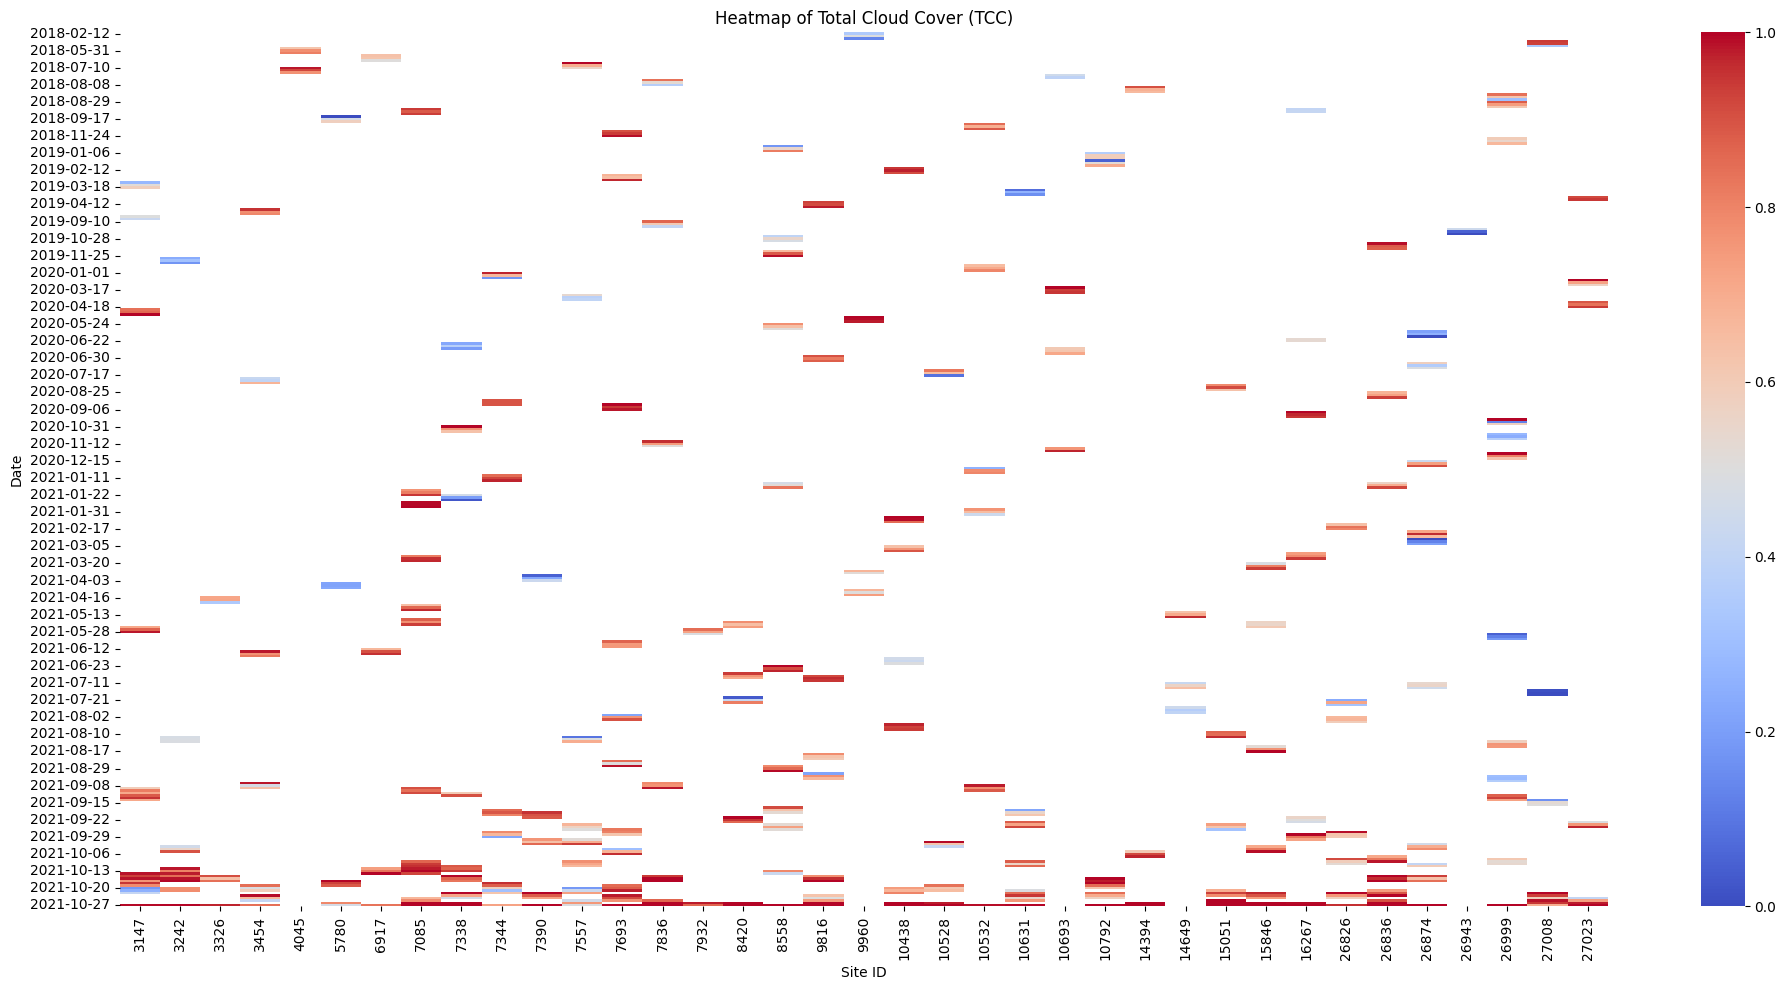

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'forecast_data' is your predefined DataFrame
forecast_data['pv_datetime'] = pd.to_datetime(forecast_data['pv_datetime'])

# Create a new column for the date without time
forecast_data['date'] = forecast_data['pv_datetime'].dt.date

# Select only numerical columns for aggregation
numerical_cols = ['generation', 'pv_hour', 'hour', 'lat', 'long', 'tilt', 'orientation',
                  'dlwrf', 'dswrf', 'duvrs', 'hcc', 'lcc', 'mcc', 'sde', 'sr', 't2m',
                  'tcc', 'u10', 'u100', 'v10', 'v100']

# Ensure 'ss_id' and 'date' are included
cols_to_aggregate = ['ss_id', 'date'] + numerical_cols
filtered_data = forecast_data[cols_to_aggregate]

# Aggregate data by site and date
heatmap_data = filtered_data.groupby(['ss_id', 'date']).mean().reset_index()

# Pivot table for heatmap
pivot_table = heatmap_data.pivot(index='date', columns='ss_id', values='tcc')

plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, cmap='coolwarm')

plt.xlabel('Site ID')
plt.ylabel('Date')
plt.title('Heatmap of Total Cloud Cover (TCC)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [17]:
import plotly.express as px

# Sample the data for plotting
sampled_data = forecast_data.sample(frac=0.1)

fig = px.scatter(sampled_data, x='pv_datetime', y='tcc', color='ss_id', title='Total Cloud Cover (TCC) Over Time for Different Sites')
fig.update_layout(xaxis_title='Datetime', yaxis_title='Total Cloud Cover (TCC)', xaxis=dict(rangeslider=dict(visible=True)))
fig.show()
